# 모듈 및 데이터 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv', index_col = 0)

# 데이터 특성 확인

In [3]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [13]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# 카테고리 변수 처리하기

In [14]:
data = pd.get_dummies(data, columns=['Gender'], drop_first = True)

In [15]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


# KMeans Clustering Modeling

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters = 3)

In [18]:
model.fit(data)

KMeans(n_clusters=3)

In [19]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

# 모델링 결과로 통계적 Summary 확인하기

In [21]:
# 기존의 data를 유지하기 위해, copy를 통하여 새로운 이름으로 복사
result_df = data.copy()

In [23]:
# label 컬럼에 모델링 결과값인 label 할당
result_df['label'] = model.labels_

In [24]:
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,0
198,32,126,74,1,2


In [25]:
# Groupby를 통하여, 각 클러스터별 통계적 차이/특징 확인
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.394737,87.000000,18.631579,0.526316
1,40.325203,44.154472,49.829268,0.406504
2,32.692308,86.538462,82.128205,0.461538


In [26]:
# Cluster별 관측치 갯수 확인
result_df['label'].value_counts()

1    123
2     39
0     38
Name: label, dtype: int64

# Elbow Method

In [28]:
distance = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    distance.append(model.inertia_)
    

In [29]:
distance

[212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331504,
 51132.70321257687,
 44391.82080487078,
 41100.78018438018,
 37425.924025974025]

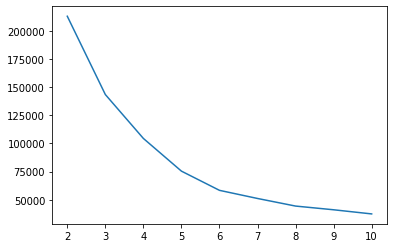

In [30]:
sns.lineplot(x=list(range(2,11)), y=distance)

# Silhoutte Score (Elbow Method로 최적값을 찾기 어려울 때)

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(data, model.labels_)

0.3880908972219034

In [33]:
sil = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))

In [34]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.40553486600451777,
 0.44424291275274114,
 0.45205475380756527,
 0.44170374346039537,
 0.4259878450877001,
 0.4134434473087184,
 0.38692020654163606]

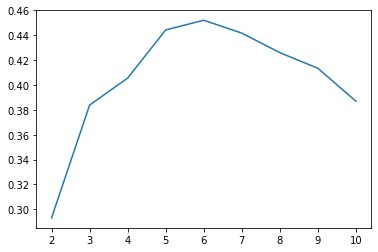

In [35]:
sns.lineplot(x=list(range(2,11)), y=sil)

# 최적의 k값으로 다시 모델링

In [36]:
model = KMeans(n_clusters = 6)

In [37]:
model.fit(data)

KMeans(n_clusters=6)

In [39]:
data['label'] = model.labels_

### 통계적 Summary확인

In [41]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,56.155556,53.377778,49.088889,0.444444
1,32.692308,86.538462,82.128205,0.461538
2,25.272727,25.727273,79.363636,0.409091
3,44.142857,25.142857,19.523810,0.380952
4,41.685714,88.228571,17.285714,0.571429
5,27.000000,56.657895,49.131579,0.342105


### Box plot으로 각 변수 특성 차이 보기

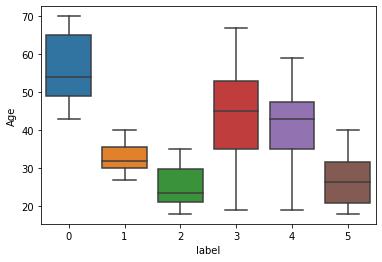

In [46]:
sns.boxplot(x='label', y='Age', data=data)

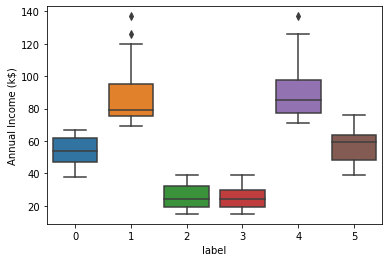

In [47]:
sns.boxplot(x='label', y='Annual Income (k$)', data=data)

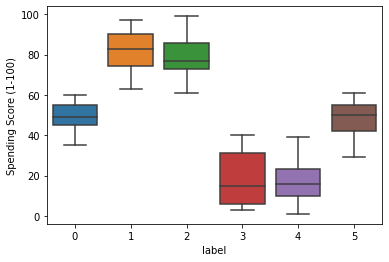

In [49]:
sns.boxplot(x='label', y='Spending Score (1-100)', data=data)

# PCA를 활용하여 변수를 줄이고 scatter plot 그리기

In [54]:
# PCA에 label 정보가 들어가면 안되므로, 다시 해당컬럼을 제거
data.drop('label', axis = 1, inplace =True)

In [56]:
from sklearn.decomposition import PCA

In [57]:
# 몇개의 변수로 줄일것인지 파라미터로 설정
pca = PCA(n_components = 2)

In [58]:
pca.fit(data)

PCA(n_components=2)

In [60]:
pca_df = pca.transform(data)

In [64]:
pca_df = pd.DataFrame(pca_df, columns=['PC1','PC2'])

In [65]:
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


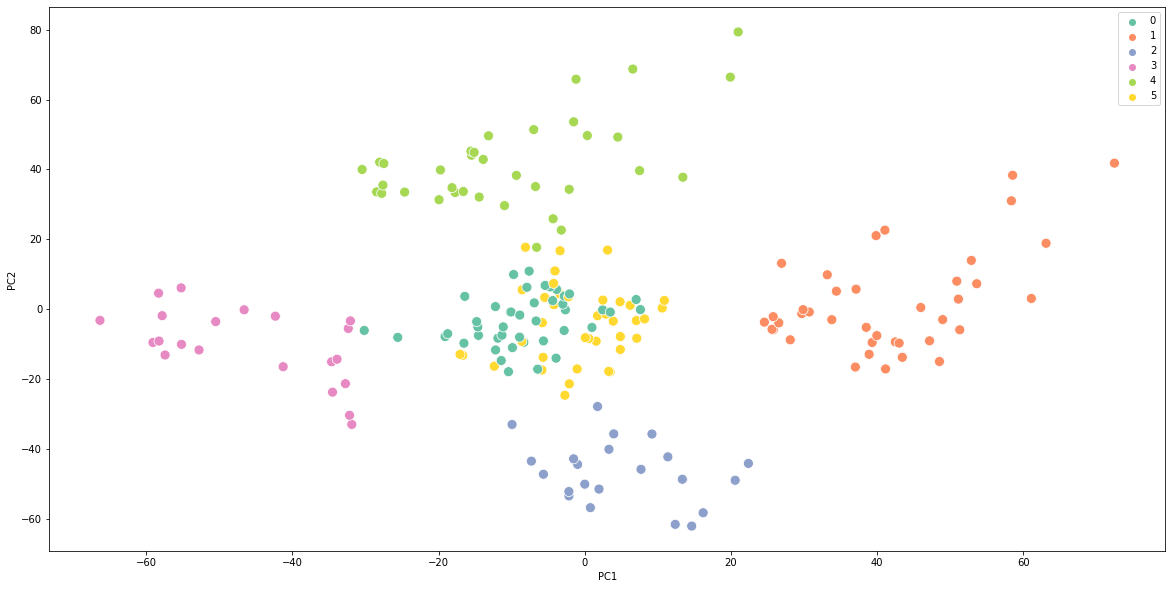

In [69]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue = model.labels_, palette='Set2', s=100)